In [1]:
import fastf1 
import pandas as pd
import numpy as np

from fastf1 import get_session

import matplotlib.pyplot as plt
import seaborn as sns

fastf1.Cache.enable_cache('F1cache')

In [2]:
new_features = pd.read_csv('new_features_output.csv')

C:\Users\jcf03\AppData\Local\Temp\ipykernel_7480\3134807600.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  new_features = pd.read_csv('new_features_output.csv')


In [3]:
ver_tel = new_features[new_features['Driver'] == 'VER']
ver_tel = ver_tel.sort_values(by=['SessionTime']).copy()
ver_tel = ver_tel.reset_index(drop=True)
ver_tel.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,delta_dist_to_ahead,relative_speed_to_ahead,brake_mean_3,throttle_std_3,rpm_std_3,delta_x,delta_y,track_movement,TrackStatus_prev,SCin30
0,2023-11-05 17:03:22.842,0 days 01:02:22.839000,NaN,0.53,0 days 00:00:00,9950.099977,0.0,1,16.0,True,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2023-11-05 17:03:22.880,0 days 01:02:22.877000,NaN,0.53,0 days 00:00:00.038000,9957.066667,0.0,1,16.0,True,...,NaN,NaN,0.333333,48.497423,407.855041,78.246462,-313.493547,323.110992,1.0,1.0
2,2023-11-05 17:03:22.956,0 days 01:02:22.953000,NaN,0.53,0 days 00:00:00.114000,9971.000000,0.0,1,16.0,True,...,NaN,NaN,0.333333,48.497423,740.126557,77.003080,-304.021806,313.621959,1.0,1.0
3,2023-11-05 17:03:23.080,0 days 01:02:23.077000,NaN,0.53,0 days 00:00:00.238000,9984.433333,0.0,1,16.0,True,...,NaN,NaN,0.333333,48.497423,358.339100,59.000000,-237.000000,244.233495,1.0,1.0
4,2023-11-05 17:03:23.196,0 days 01:02:23.193000,3.0,0.53,0 days 00:00:00.354000,9997.000000,0.0,1,16.0,True,...,NaN,NaN,0.333333,48.497423,406.357396,31.987010,-130.579836,134.440553,1.0,1.0


In [33]:
tel_spgp_2023 = new_features[new_features['Driver'] == 'VER']
tel_spgp_2023 = tel_spgp_2023.sort_values(by=['SessionTime']).copy()
tel_spgp_2023 = tel_spgp_2023.reset_index(drop=True)
tel_spgp_2023.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,delta_dist_to_ahead,relative_speed_to_ahead,brake_mean_3,throttle_std_3,rpm_std_3,delta_x,delta_y,track_movement,TrackStatus_prev,SCin30
0,2023-11-05 17:03:22.842,0 days 01:02:22.839000,NaN,0.53,0 days 00:00:00,9950.099977,0.0,1,16.0,True,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2023-11-05 17:03:22.880,0 days 01:02:22.877000,NaN,0.53,0 days 00:00:00.038000,9957.066667,0.0,1,16.0,True,...,NaN,NaN,0.333333,48.497423,407.855041,78.246462,-313.493547,323.110992,1.0,1.0
2,2023-11-05 17:03:22.956,0 days 01:02:22.953000,NaN,0.53,0 days 00:00:00.114000,9971.000000,0.0,1,16.0,True,...,NaN,NaN,0.333333,48.497423,740.126557,77.003080,-304.021806,313.621959,1.0,1.0
3,2023-11-05 17:03:23.080,0 days 01:02:23.077000,NaN,0.53,0 days 00:00:00.238000,9984.433333,0.0,1,16.0,True,...,NaN,NaN,0.333333,48.497423,358.339100,59.000000,-237.000000,244.233495,1.0,1.0
4,2023-11-05 17:03:23.196,0 days 01:02:23.193000,3.0,0.53,0 days 00:00:00.354000,9997.000000,0.0,1,16.0,True,...,NaN,NaN,0.333333,48.497423,406.357396,31.987010,-130.579836,134.440553,1.0,1.0


In [4]:
# For NaNs
nan_counts = ver_tel.isnull().sum()
print("NaN counts by column:")
print(nan_counts[nan_counts > 0])  # Only show columns with NaNs

# For infinities (both positive and negative)
inf_counts = ver_tel.select_dtypes(include=[np.number]).apply(lambda x: np.isinf(x).sum())
print("\nInfinity counts by column:")
print(inf_counts[inf_counts > 0])  # Only show columns with infinities

# Combined check for all problematic values
print("\nCombined problematic values:")
for col in ver_tel.columns:
    if ver_tel[col].dtype in ['float64', 'float32', 'int64', 'int32']:
        nan_count = ver_tel[col].isnull().sum()
        inf_count = np.isinf(ver_tel[col]).sum()
        if nan_count > 0 or inf_count > 0:
            print(f"{col}: {nan_count} NaNs, {inf_count} infinities")

# Or as a more compact one-liner for each type:
print("\nNaN summary:")
print(ver_tel.isnull().sum().sort_values(ascending=False))

print("\nInfinity summary:")
print(ver_tel.select_dtypes(include=[np.number]).apply(lambda x: np.isinf(x).sum()).sort_values(ascending=False))

NaN counts by column:
DriverAhead                40430
DistanceToDriverAhead      37744
delta_time                     1
delta_speed                    1
delta_throttle                 1
delta_brake                    1
delta_rpm                      1
delta_gear                     1
acceleration                 152
delta_dist_to_ahead        41914
relative_speed_to_ahead    41914
throttle_std_3                 1
rpm_std_3                      1
delta_x                        1
delta_y                        1
track_movement                 1
TrackStatus_prev               1
dtype: int64

Infinity counts by column:
acceleration               8874
relative_speed_to_ahead      42
dtype: int64

Combined problematic values:
DriverAhead: 40430 NaNs, 0 infinities
DistanceToDriverAhead: 37744 NaNs, 0 infinities
delta_time: 1 NaNs, 0 infinities
delta_speed: 1 NaNs, 0 infinities
delta_throttle: 1 NaNs, 0 infinities
delta_rpm: 1 NaNs, 0 infinities
delta_gear: 1 NaNs, 0 infinities
acceleration: 

In [3]:
feature_cols = ['RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'X', 'Y', 'Z', 'delta_time',
                'delta_speed', 'delta_throttle', 'delta_brake', 'delta_rpm', 'delta_gear',
       'acceleration', 'brake_mean_3', 'throttle_std_3', 'rpm_std_3', 'delta_x', 'delta_y', 'track_movement']

#feature_cols = ['DistanceToDriverAhead', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'X', 'Y', 'Z']

target_col = ['SCin30']

In [4]:
spgp2022 = pd.read_csv('spgp2022_output.csv')

C:\Users\jcf03\AppData\Local\Temp\ipykernel_7480\1608787867.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  spgp2022 = pd.read_csv('spgp2022_output.csv')


In [7]:
tel_2022 = spgp2022[spgp2022['Driver'] == 'VER']
tel_2022 = tel_2022.sort_values(by=['SessionTime']).copy()
tel_2022 = tel_2022.reset_index(drop=True)

In [8]:
def create_end_focused_sequences(df, feature_cols, target_col, sequence_length, prediction_horizon=30):
    """Use sequence to predict what happens AFTER the sequence"""
    X, y = [], []
    for i in range(len(df) - sequence_length - prediction_horizon + 1):
        # Features: current sequence
        seq_x = df.iloc[i:i+sequence_length][feature_cols].values
        
        # Target: what happens in the NEXT prediction_horizon timesteps
        future_window = df.iloc[i+sequence_length:i+sequence_length+prediction_horizon][target_col]
        seq_y = int(future_window.any())
        
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [34]:
# Train on 2022 (more safety car events)
X_train_seq, y_train_seq = create_end_focused_sequences(
    tel_2022, feature_cols, 'SCin30', 
    sequence_length=100, prediction_horizon=30
)

# Test on 2023 (fewer safety car events) 
X_test_seq, y_test_seq = create_end_focused_sequences(
    tel_spgp_2023, feature_cols, 'SCin30',
    sequence_length=100, prediction_horizon=30
)

print(f"Training (2022): {np.bincount(y_train_seq)}")
print(f"Testing (2023): {np.bincount(y_test_seq)}")

Training (2022): [44279   509]
Testing (2023): [42485   108]


In [35]:
X_train_seq = X_train_seq.astype(np.float32)
y_train_seq = y_train_seq.astype(np.float32)
X_test_seq = X_test_seq.astype(np.float32)
y_test_seq = y_test_seq.astype(np.float32)

In [36]:
X_train_seq = np.nan_to_num(X_train_seq, nan=0.0, posinf=1e6, neginf=-1e6)
X_test_seq = np.nan_to_num(X_test_seq, nan=0.0, posinf=1e6, neginf=-1e6)

In [37]:
from sklearn.preprocessing import StandardScaler

# Flatten X to 2D (combine sequences and time steps)
num_sequences, seq_len, num_features = X_train_seq.shape
X_train_flat = X_train_seq.reshape(-1, num_features)  # shape: (42692 * 30, 24)

# Fit and transform
scaler = StandardScaler()
X_train_scaled_flat = scaler.fit_transform(X_train_flat)

# Reshape back to (42692, 30, 24)
X_train_scaled = X_train_scaled_flat.reshape(num_sequences, seq_len, num_features)

In [38]:
num_sequences_test, seq_len_test, num_features_test = X_test_seq.shape
X_test_flat = X_test_seq.reshape(-1, num_features_test)  # shape: (42692 * 30, 24)

# Fit and transform
X_test_scaled_flat = scaler.fit_transform(X_test_flat)

# Reshape back to (42692, 30, 24)
X_test_scaled = X_test_scaled_flat.reshape(num_sequences_test, seq_len_test, num_features_test)

In [39]:
import torch
from torch.utils.data import Dataset, DataLoader

class TelemetrySequenceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)  # Use long for classification if output is class ID

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Example usage
train_dataset = TelemetrySequenceDataset(X_train_scaled, y_train_seq)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [40]:
import torch.nn as nn

class GRUClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout=0.2):
        super(GRUClassifier, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        #self.sigmoid = nn.Sigmoid()  # For binary classification ##NEED TO REMOVE

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]  # take last time step
        out = self.fc(out)
        return out

In [21]:
model = GRUClassifier(input_dim=21, hidden_dim=64, num_layers=2, output_dim=1)
pos_weight = torch.tensor([44279 / 509])
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 50  # Train longer but without early stopping
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")
    
    # Save model every 10 epochs to monitor progress
    if epoch % 10 == 0:
        torch.save(model.state_dict(), f'model_epoch_{epoch}.pth')

Epoch 1, Loss: 0.8476
Epoch 2, Loss: 0.3429
Epoch 3, Loss: 0.1694
Epoch 4, Loss: 0.1413
Epoch 5, Loss: 0.0937
Epoch 6, Loss: 0.0645
Epoch 7, Loss: 0.0552
Epoch 8, Loss: 0.0149
Epoch 9, Loss: 0.0791
Epoch 10, Loss: 0.0078
Epoch 11, Loss: 0.0113
Epoch 12, Loss: 0.0232
Epoch 13, Loss: 0.0036
Epoch 14, Loss: 0.0053
Epoch 15, Loss: 0.0582
Epoch 16, Loss: 0.0051
Epoch 17, Loss: 0.0030
Epoch 18, Loss: 0.0017
Epoch 19, Loss: 0.0015
Epoch 20, Loss: 0.0020
Epoch 21, Loss: 0.0704
Epoch 22, Loss: 0.0075
Epoch 23, Loss: 0.0035
Epoch 24, Loss: 0.0021
Epoch 25, Loss: 0.0021
Epoch 26, Loss: 0.0012
Epoch 27, Loss: 0.0041
Epoch 28, Loss: 0.0089
Epoch 29, Loss: 0.0018
Epoch 30, Loss: 0.0041
Epoch 31, Loss: 0.0018
Epoch 32, Loss: 0.0031
Epoch 33, Loss: 0.0016
Epoch 34, Loss: 0.0046
Epoch 35, Loss: 0.0248
Epoch 36, Loss: 0.0048
Epoch 37, Loss: 0.0016
Epoch 38, Loss: 0.0010
Epoch 39, Loss: 0.0016
Epoch 40, Loss: 0.0013
Epoch 41, Loss: 0.0008
Epoch 42, Loss: 0.0007
Epoch 43, Loss: 0.0004
Epoch 44, Loss: 0.03

In [27]:
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    precision_recall_curve, roc_curve, auc,
    precision_score, recall_score, f1_score, accuracy_score
)

In [42]:
# Get predictions
loaded_model.eval()
with torch.no_grad():
    logits = loaded_model(torch.tensor(X_test_scaled, dtype=torch.float32))
    probs = torch.sigmoid(logits).squeeze().numpy()

In [43]:
# Multiple threshold analysis
print("=" * 60)
print("THRESHOLD ANALYSIS")
print("=" * 60)
print("Thresh\tPrec\tRecall\tF1\tAcc\tTP\tFP\tFN\tTN")
print("-" * 60)

best_f1 = 0
best_threshold = 0.5

for threshold in np.arange(0.1, 0.9, 0.1):
    pred_binary = (probs > threshold).astype(int)
    
    precision = precision_score(y_test_seq, pred_binary, zero_division=0)
    recall = recall_score(y_test_seq, pred_binary, zero_division=0)
    f1 = f1_score(y_test_seq, pred_binary, zero_division=0)
    accuracy = accuracy_score(y_test_seq, pred_binary)
    
    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test_seq, pred_binary).ravel()
    
    print(f"{threshold:.1f}\t{precision:.3f}\t{recall:.3f}\t{f1:.3f}\t{accuracy:.3f}\t{tp}\t{fp}\t{fn}\t{tn}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold:.1f} (F1: {best_f1:.3f})")

# Detailed results with best threshold
pred_binary_best = (probs > best_threshold).astype(int)

THRESHOLD ANALYSIS
Thresh	Prec	Recall	F1	Acc	TP	FP	FN	TN
------------------------------------------------------------
0.1	0.189	0.250	0.215	0.995	27	116	81	42369
0.2	0.186	0.241	0.210	0.995	26	114	82	42371
0.3	0.194	0.241	0.215	0.996	26	108	82	42377
0.4	0.203	0.241	0.220	0.996	26	102	82	42383
0.5	0.226	0.241	0.233	0.996	26	89	82	42396
0.6	0.241	0.241	0.241	0.996	26	82	82	42403
0.7	0.263	0.241	0.251	0.996	26	73	82	42412
0.8	0.321	0.241	0.275	0.997	26	55	82	42430

Best threshold: 0.8 (F1: 0.275)


In [44]:
print("\n" + "=" * 60)
print("DETAILED CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(y_test_seq, pred_binary_best, 
                          target_names=['No Safety Car', 'Safety Car']))

# Confusion Matrix
print("\n" + "=" * 60)
print("CONFUSION MATRIX")
print("=" * 60)
cm = confusion_matrix(y_test_seq, pred_binary_best)
print(f"                 Predicted")
print(f"                 No SC  Safety Car")
print(f"Actual No SC     {cm[0,0]:5d}  {cm[0,1]:9d}")
print(f"Actual Safety Car {cm[1,0]:4d}  {cm[1,1]:9d}")

# Key performance metrics
print("\n" + "=" * 60)
print("KEY PERFORMANCE METRICS")
print("=" * 60)
# Safe ROC AUC calculation
try:
    roc_auc = roc_auc_score(y_test_seq, probs)
    print(f"ROC AUC Score:           {roc_auc:.4f}")
except:
    print("ROC AUC Score:           Cannot calculate (insufficient data)")
    roc_auc = None

# Safe PR AUC calculation
try:
    precision_vals, recall_vals, _ = precision_recall_curve(y_test_seq, probs)
    # Only calculate if we have valid curve
    if len(precision_vals) > 1 and len(recall_vals) > 1:
        pr_auc = auc(recall_vals, precision_vals)
        print(f"Precision-Recall AUC:    {pr_auc:.4f}")
    else:
        print("Precision-Recall AUC:    Cannot calculate (insufficient variation)")
        pr_auc = None
except:
    print("Precision-Recall AUC:    Cannot calculate (error in curve)")
    pr_auc = None

print(f"Best F1 Score:           {best_f1:.4f}")
print(f"Precision (Safety Cars): {precision_score(y_test_seq, pred_binary_best, zero_division=0):.4f}")
print(f"Recall (Safety Cars):    {recall_score(y_test_seq, pred_binary_best, zero_division=0):.4f}")
print(f"Overall Accuracy:        {accuracy_score(y_test_seq, pred_binary_best):.4f}")


DETAILED CLASSIFICATION REPORT
               precision    recall  f1-score   support

No Safety Car       1.00      1.00      1.00     42485
   Safety Car       0.32      0.24      0.28       108

     accuracy                           1.00     42593
    macro avg       0.66      0.62      0.64     42593
 weighted avg       1.00      1.00      1.00     42593


CONFUSION MATRIX
                 Predicted
                 No SC  Safety Car
Actual No SC     42430         55
Actual Safety Car   82         26

KEY PERFORMANCE METRICS
ROC AUC Score:           Cannot calculate (insufficient data)
Precision-Recall AUC:    0.0669
Best F1 Score:           0.2751
Precision (Safety Cars): 0.3210
Recall (Safety Cars):    0.2407
Overall Accuracy:        0.9968


In [45]:
# Business impact metrics
tp = np.sum((pred_binary_best == 1) & (y_test_seq == 1))
fp = np.sum((pred_binary_best == 1) & (y_test_seq == 0))
fn = np.sum((pred_binary_best == 0) & (y_test_seq == 1))

print(f"\nBUSINESS IMPACT:")
print(f"Safety Cars Caught:      {tp}/{len(y_test_seq[y_test_seq==1])} ({tp/len(y_test_seq[y_test_seq==1])*100:.1f}%)")
print(f"False Alarms:            {fp}")
print(f"Missed Safety Cars:      {fn}")


BUSINESS IMPACT:
Safety Cars Caught:      26/108 (24.1%)
False Alarms:            55
Missed Safety Cars:      82


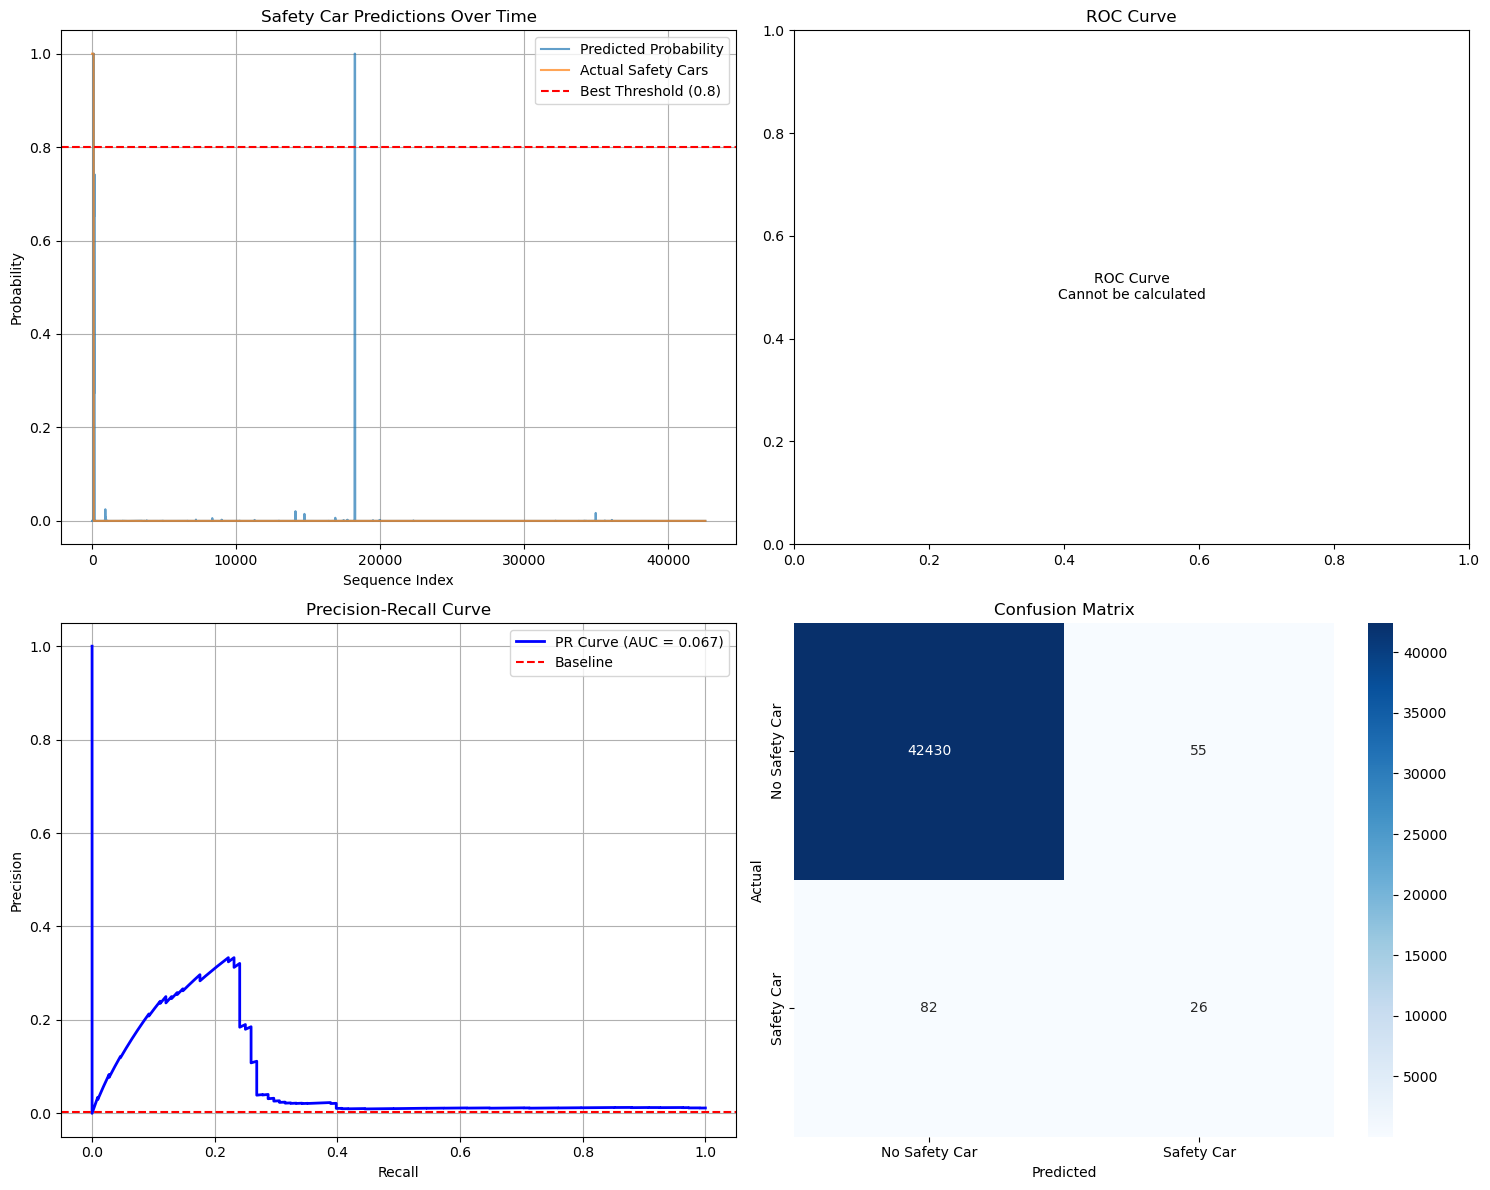


PROBABILITY DISTRIBUTION
Mean probability:        0.0027
Std probability:         0.0482
Max probability:         1.0000
Min probability:         0.0000
Predictions > 0.5:       115
Predictions > 0.8:       81
Predictions > 0.9:       77


In [46]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Prediction Timeline
axes[0,0].plot(probs, alpha=0.7, label='Predicted Probability')
axes[0,0].plot(y_test_seq, alpha=0.7, label='Actual Safety Cars')
axes[0,0].axhline(y=best_threshold, color='red', linestyle='--', label=f'Best Threshold ({best_threshold:.1f})')
axes[0,0].set_title('Safety Car Predictions Over Time')
axes[0,0].set_xlabel('Sequence Index')
axes[0,0].set_ylabel('Probability')
axes[0,0].legend()
axes[0,0].grid(True)

# 2. ROC Curve (only if calculable)
if roc_auc is not None:
    try:
        fpr, tpr, _ = roc_curve(y_test_seq, probs)
        axes[0,1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
        axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[0,1].set_xlim([0.0, 1.0])
        axes[0,1].set_ylim([0.0, 1.05])
        axes[0,1].set_xlabel('False Positive Rate')
        axes[0,1].set_ylabel('True Positive Rate')
        axes[0,1].set_title('ROC Curve')
        axes[0,1].legend()
        axes[0,1].grid(True)
    except:
        axes[0,1].text(0.5, 0.5, 'ROC Curve\nCannot be calculated', 
                      ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title('ROC Curve')
else:
    axes[0,1].text(0.5, 0.5, 'ROC Curve\nCannot be calculated', 
                  ha='center', va='center', transform=axes[0,1].transAxes)
    axes[0,1].set_title('ROC Curve')

# 3. Precision-Recall Curve (only if calculable)
if pr_auc is not None:
    try:
        axes[1,0].plot(recall_vals, precision_vals, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.3f})')
        axes[1,0].axhline(y=len(y_test_seq[y_test_seq==1])/len(y_test_seq), color='red', linestyle='--', label='Baseline')
        axes[1,0].set_xlabel('Recall')
        axes[1,0].set_ylabel('Precision')
        axes[1,0].set_title('Precision-Recall Curve')
        axes[1,0].legend()
        axes[1,0].grid(True)
    except:
        axes[1,0].text(0.5, 0.5, 'PR Curve\nCannot be calculated', 
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Precision-Recall Curve')
else:
    axes[1,0].text(0.5, 0.5, 'PR Curve\nCannot be calculated', 
                  ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Precision-Recall Curve')

# 4. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Safety Car', 'Safety Car'],
            yticklabels=['No Safety Car', 'Safety Car'],
            ax=axes[1,1])
axes[1,1].set_title('Confusion Matrix')
axes[1,1].set_ylabel('Actual')
axes[1,1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Probability distribution analysis
print("\n" + "=" * 60)
print("PROBABILITY DISTRIBUTION")
print("=" * 60)
print(f"Mean probability:        {probs.mean():.4f}")
print(f"Std probability:         {probs.std():.4f}")
print(f"Max probability:         {probs.max():.4f}")
print(f"Min probability:         {probs.min():.4f}")
print(f"Predictions > 0.5:       {(probs > 0.5).sum()}")
print(f"Predictions > 0.8:       {(probs > 0.8).sum()}")
print(f"Predictions > 0.9:       {(probs > 0.9).sum()}")

In [23]:
import pickle
import joblib

In [37]:
# Method 1: Save just the model weights (recommended)
torch.save(model.state_dict(), 'f1_safety_car_model.pth')

# Method 2: Save the entire model (alternative)
torch.save(model, 'f1_safety_car_model_complete.pth')

# Method 3: Save with additional metadata (best practice)
checkpoint = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'model_architecture': {
        'input_dim': 21,
        'hidden_dim': 64,
        'num_layers': 2,
        'output_dim': 1
    },
    'training_info': {
        'epochs_trained': num_epochs,
        'best_threshold': best_threshold,
        'best_f1_score': best_f1,
        'class_weight': 44279/509,
        'sequence_length': 100,
        'prediction_horizon': 30
    },
    'performance_metrics': {
        'precision': precision_score(y_test_seq, pred_binary_best, zero_division=0),
        'recall': recall_score(y_test_seq, pred_binary_best, zero_division=0),
        'f1_score': best_f1
    }
}

torch.save(checkpoint, 'f1_safety_car_model_checkpoint.pth')

# Save your feature scaler if you used one
if 'scaler' in locals():
    joblib.dump(scaler, 'f1_feature_scaler.joblib')

# Save feature column names for future reference
feature_info = {
    'feature_columns': feature_cols,
    'target_column': 'SCin30',
    'model_description': 'F1 Safety Car Prediction - 2022 training, 2023 test'
}

with open('f1_model_info.pkl', 'wb') as f:
    pickle.dump(feature_info, f)

print("Model saved successfully!")

Model saved successfully!


In [24]:
# Load the model
def load_f1_model(checkpoint_path, model_class):
    # Load with weights_only=False (since it's your own model)
    checkpoint = torch.load(checkpoint_path, weights_only=False)
    
    model = model_class(
        input_dim=checkpoint['model_architecture']['input_dim'],
        hidden_dim=checkpoint['model_architecture']['hidden_dim'],
        num_layers=checkpoint['model_architecture']['num_layers'],
        output_dim=checkpoint['model_architecture']['output_dim']
    )
    
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    return model, checkpoint

# Usage:
loaded_model, model_info = load_f1_model('f1_safety_car_model_checkpoint.pth', GRUClassifier)

# Load feature info
with open('f1_model_info.pkl', 'rb') as f:
    feature_info = pickle.load(f)

# Load scaler if you used one
# scaler = joblib.load('f1_feature_scaler.joblib')

print(f"Model loaded! Best threshold: {model_info['training_info']['best_threshold']}")
print(f"Expected F1 score: {model_info['training_info']['best_f1_score']:.4f}")

Model loaded! Best threshold: 0.8
Expected F1 score: 0.9980



RESULTS FOR HAM:
Precision: 0.996
Recall: 1.000
F1-Score: 0.998
True Positives: 509
False Positives: 2
False Negatives: 0
True Negatives: 44277
Safety Cars Caught: 509/509 (100.0%)


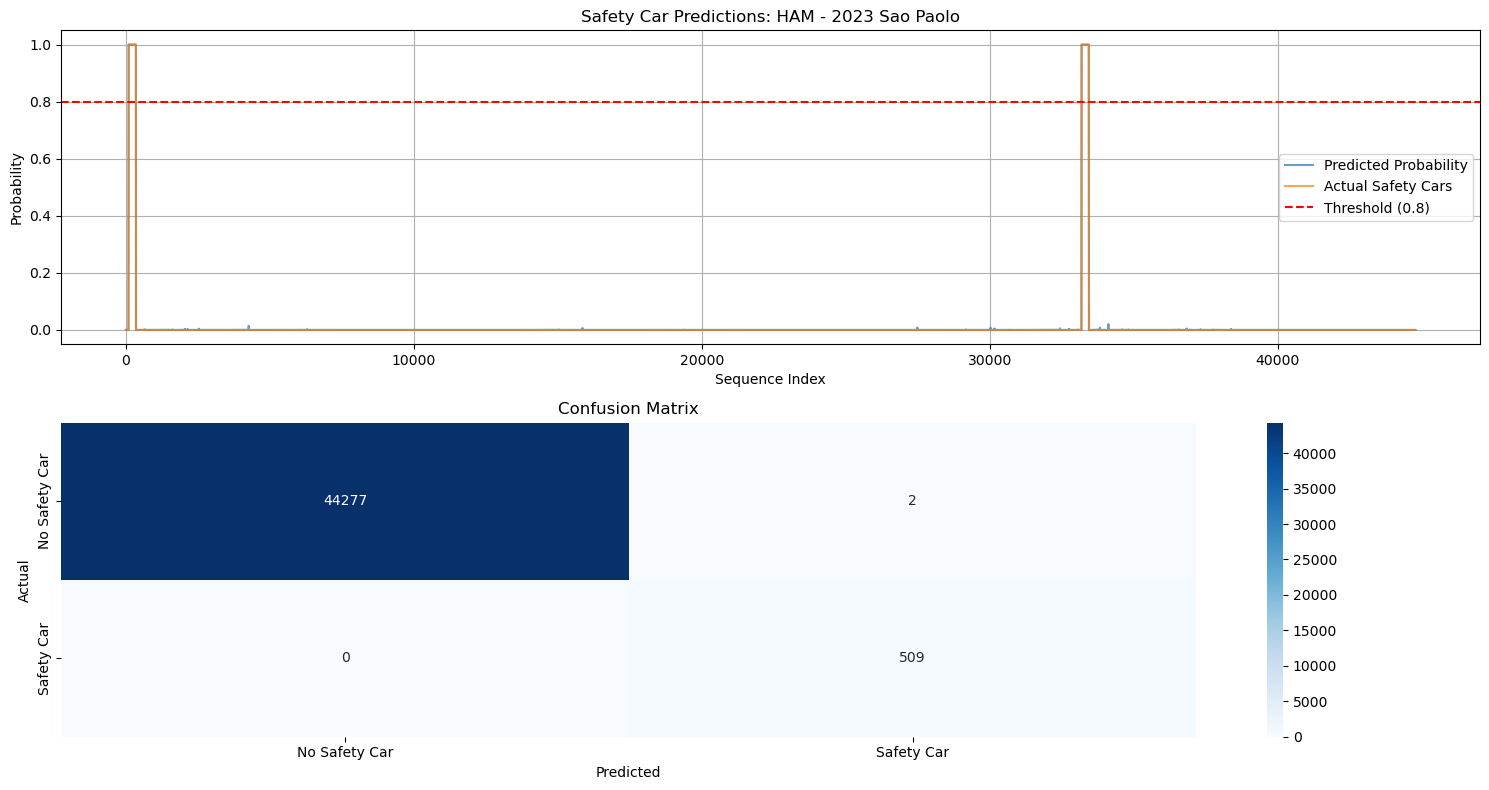

In [31]:
loaded_model.eval()
with torch.no_grad():
    logits = loaded_model(torch.tensor(X_test_scaled, dtype=torch.float32))
    probs_new = torch.sigmoid(logits).squeeze().numpy()
    
# Step 5: Evaluate using the saved best threshold
best_threshold = model_info['training_info']['best_threshold']
pred_binary = (probs_new > best_threshold).astype(int)

# Calculate metrics
precision = precision_score(y_test_seq, pred_binary, zero_division=0)
recall = recall_score(y_test_seq, pred_binary, zero_division=0)
f1 = f1_score(y_test_seq, pred_binary, zero_division=0)

# Confusion matrix
cm = confusion_matrix(y_test_seq, pred_binary)
tn, fp, fn, tp = cm.ravel()

print(f"\nRESULTS FOR HAM:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Negatives: {tn}")

if len(y_test_seq[y_test_seq==1]) > 0:
    print(f"Safety Cars Caught: {tp}/{len(y_test_seq[y_test_seq==1])} ({tp/len(y_test_seq[y_test_seq==1])*100:.1f}%)")

# Step 6: Visualize results
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(probs_new, alpha=0.7, label='Predicted Probability')
plt.plot(y_test_seq, alpha=0.7, label='Actual Safety Cars')
plt.axhline(y=best_threshold, color='red', linestyle='--', label=f'Threshold ({best_threshold:.1f})')
plt.title(f'Safety Car Predictions: HAM - 2023 Sao Paolo')
plt.xlabel('Sequence Index')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
# Confusion matrix heatmap
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Safety Car', 'Safety Car'],
            yticklabels=['No Safety Car', 'Safety Car'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout()
plt.show()


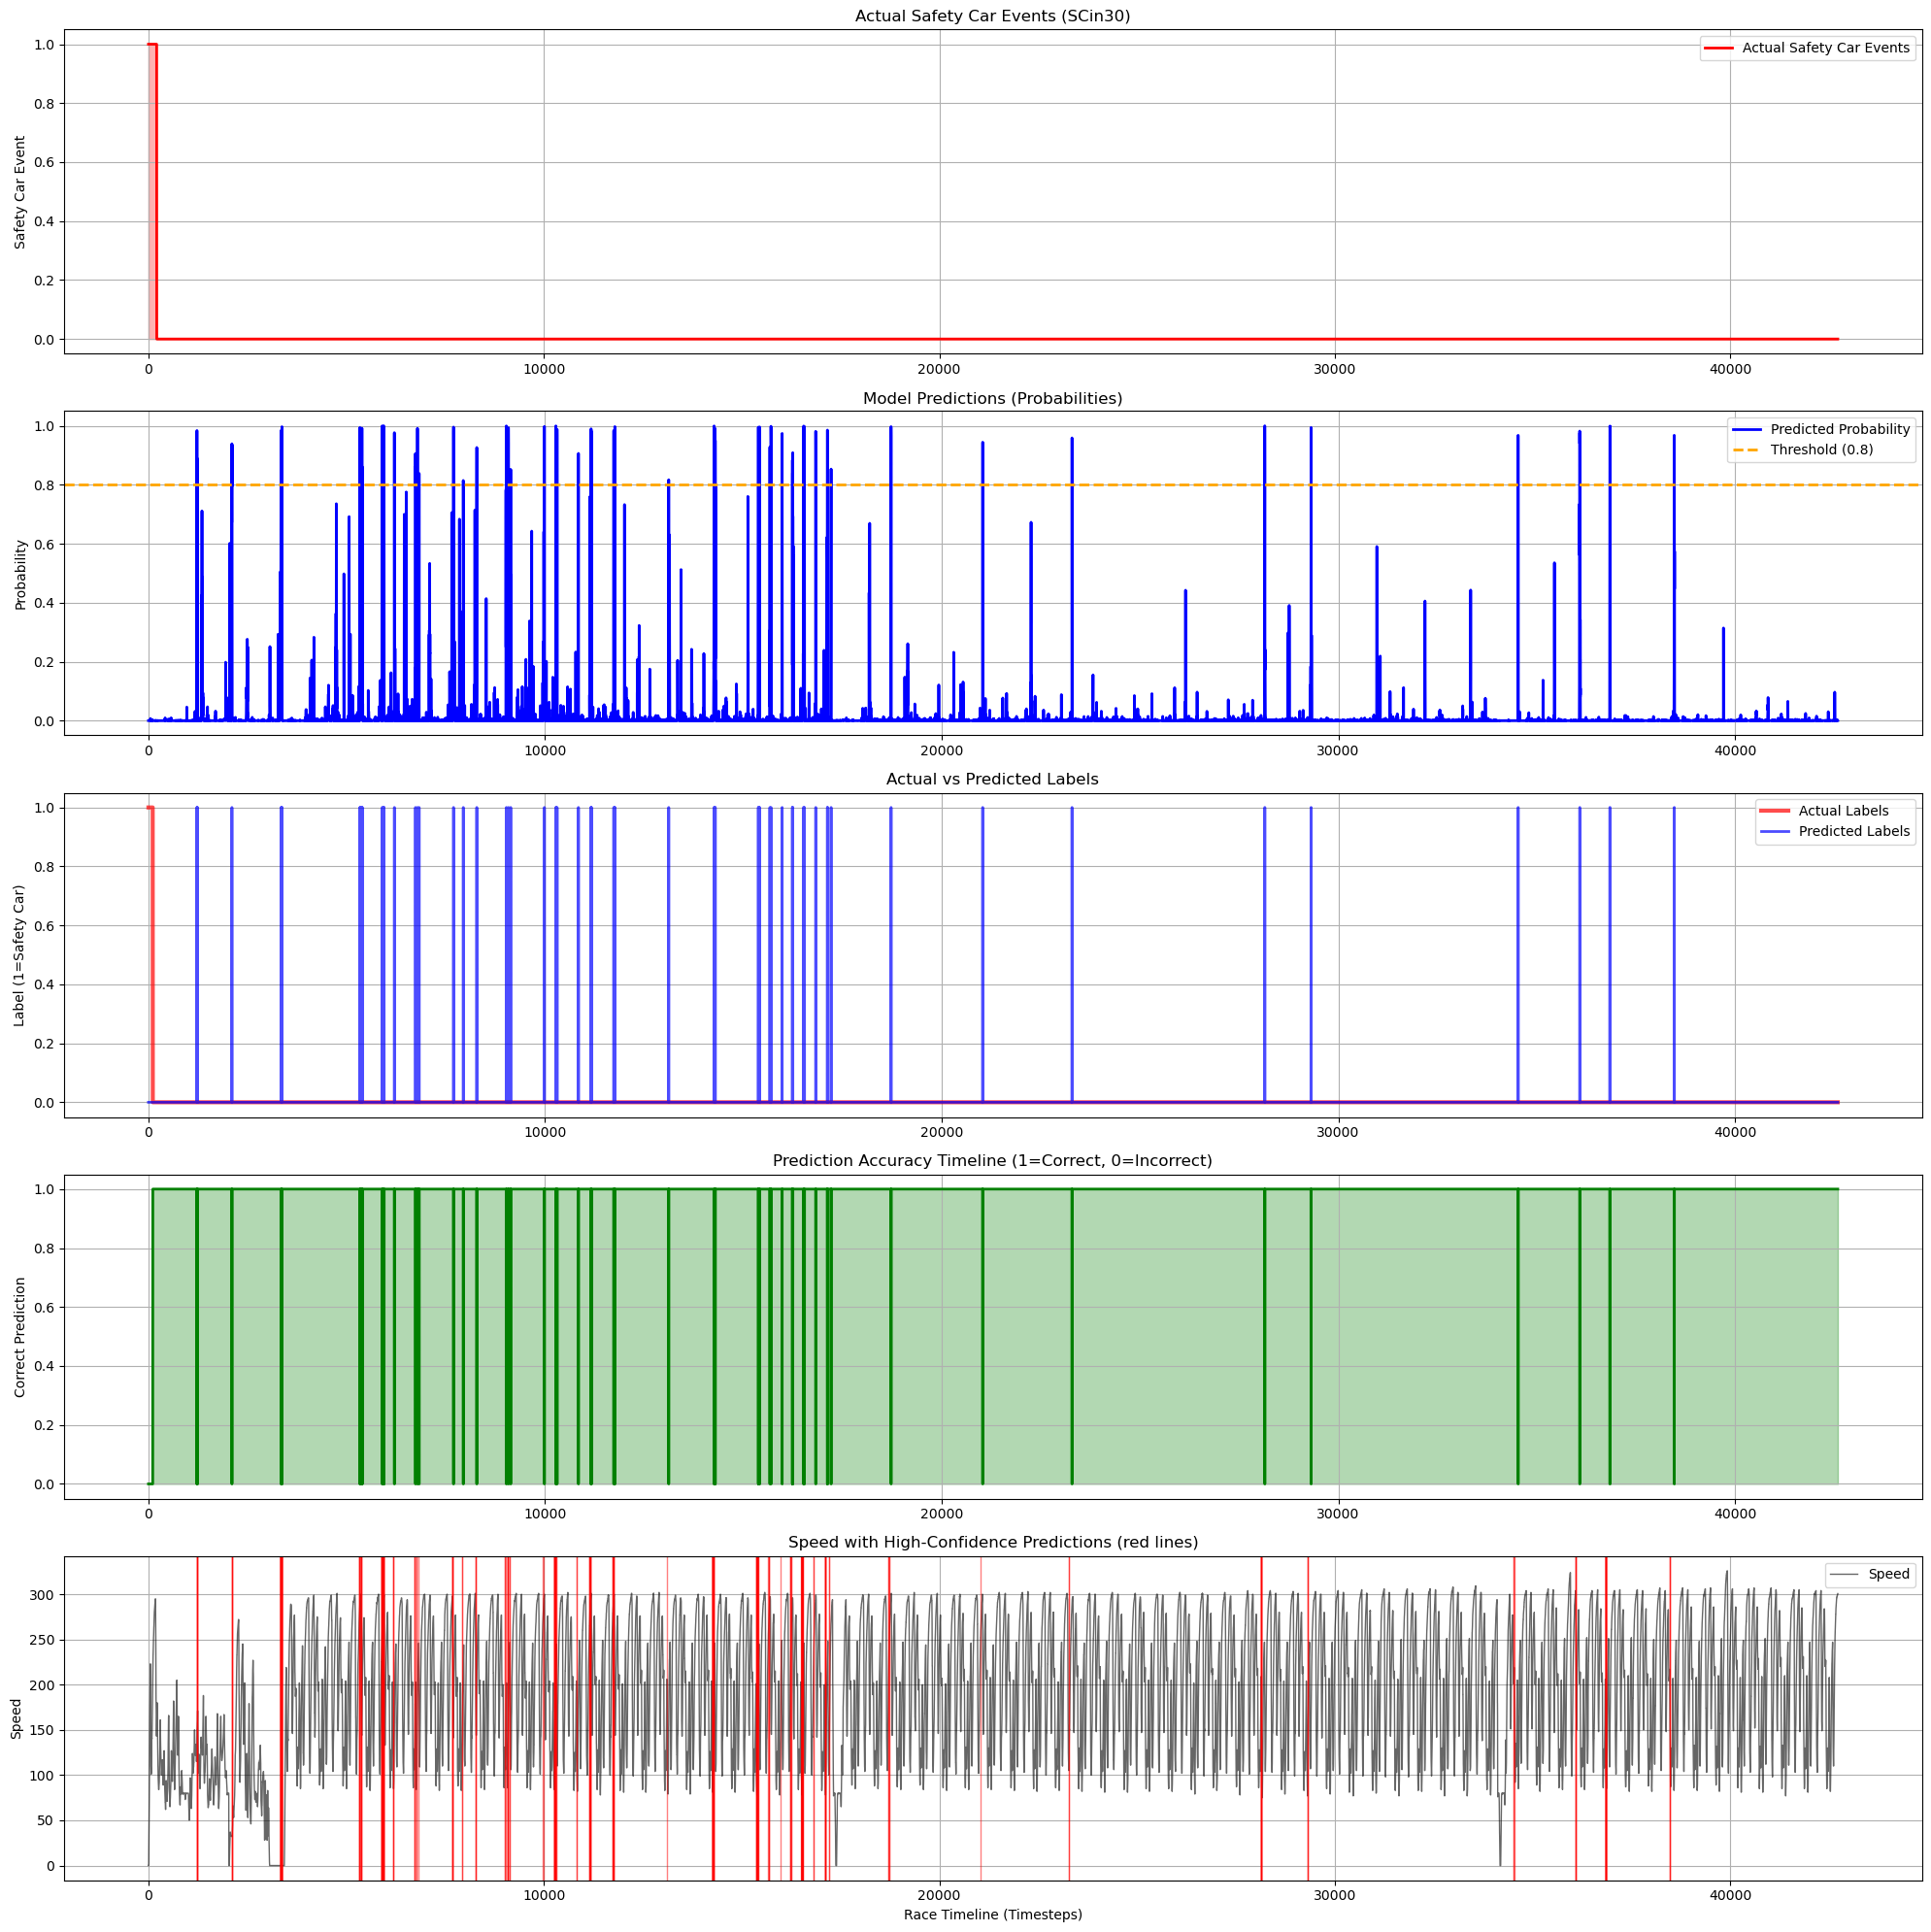

In [48]:
def plot_race_with_predictions(df, X, y, feature_cols, model, best_threshold=0.8):
    """
    Plot race timeline including model predictions
    """
    # Get model predictions
    model.eval()
    with torch.no_grad():
        logits = model(torch.tensor(X, dtype=torch.float32))
        probs = torch.sigmoid(logits).squeeze().numpy()
    
    pred_binary = (probs > best_threshold).astype(int)
    
    fig, axes = plt.subplots(5, 1, figsize=(20, 20))
    
    race_timeline = np.arange(len(df))
    sequence_timeline = np.arange(len(y))
    
    # 1. Raw safety car events
    safety_car_raw = df['SCin30'].values
    axes[0].plot(race_timeline, safety_car_raw, 'r-', linewidth=2, label='Actual Safety Car Events')
    axes[0].fill_between(race_timeline, 0, safety_car_raw, alpha=0.3, color='red')
    axes[0].set_title('Actual Safety Car Events (SCin30)')
    axes[0].set_ylabel('Safety Car Event')
    axes[0].legend()
    axes[0].grid(True)
    
    # 2. Model predictions (probabilities)
    axes[1].plot(sequence_timeline, probs, 'b-', linewidth=2, label='Predicted Probability')
    axes[1].axhline(y=best_threshold, color='orange', linestyle='--', linewidth=2, label=f'Threshold ({best_threshold})')
    axes[1].fill_between(sequence_timeline, 0, probs, alpha=0.3, color='blue')
    axes[1].set_title('Model Predictions (Probabilities)')
    axes[1].set_ylabel('Probability')
    axes[1].legend()
    axes[1].grid(True)
    
    # 3. Binary predictions vs actual labels
    axes[2].plot(sequence_timeline, y, 'r-', linewidth=3, alpha=0.7, label='Actual Labels')
    axes[2].plot(sequence_timeline, pred_binary, 'b-', linewidth=2, alpha=0.7, label='Predicted Labels')
    axes[2].set_title('Actual vs Predicted Labels')
    axes[2].set_ylabel('Label (1=Safety Car)')
    axes[2].legend()
    axes[2].grid(True)
    
    # 4. Prediction accuracy timeline
    correct_predictions = (y == pred_binary).astype(int)
    axes[3].plot(sequence_timeline, correct_predictions, 'g-', linewidth=2)
    axes[3].fill_between(sequence_timeline, 0, correct_predictions, alpha=0.3, color='green')
    axes[3].set_title('Prediction Accuracy Timeline (1=Correct, 0=Incorrect)')
    axes[3].set_ylabel('Correct Prediction')
    axes[3].grid(True)
    
    # 5. Key telemetry with predictions overlay
    if 'Speed' in feature_cols:
        speed_data = df['Speed'].values
        axes[4].plot(race_timeline, speed_data, 'k-', alpha=0.6, linewidth=1, label='Speed')
        
        # Mark high-confidence predictions
        high_conf_sequences = sequence_timeline[probs > 0.8]
        for seq_idx in high_conf_sequences:
            if seq_idx < len(race_timeline):
                axes[4].axvline(x=seq_idx, color='red', alpha=0.5, linewidth=1)
        
        axes[4].set_title('Speed with High-Confidence Predictions (red lines)')
        axes[4].set_xlabel('Race Timeline (Timesteps)')
        axes[4].set_ylabel('Speed')
        axes[4].legend()
        axes[4].grid(True)
    
    plt.tight_layout()
    plt.show()

# Usage with model predictions
plot_race_with_predictions(tel_spgp_2023, X_test_seq, y_test_seq, feature_cols, loaded_model, best_threshold=0.8)